In [ ]:
# TESTING
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the VTK files
directory = r"H:/DDGAN/DD_test"

# Names of the VTK files for u, v, and w
file_names = ['u_0.vtk', 'v_0.vtk', 'w_0.vtk']
variables = ['u', 'v', 'w']  # Corresponding data field names, adjust if different

# Initialize dictionary to hold the matrices
matrices = {}

# Loop through each file and process
for file_name, variable in zip(file_names, variables):
    # Construct the full file path
    file_path = f"{directory}/{file_name}"
    
    # Load the VTK file
    mesh = pv.read(file_path)
    
    # Assuming data is stored as point data and directly accessible
    data = mesh.point_data[variable]  # Adjust as per your actual data structure
    
    # Reshape the data into 256x256 grid
    matrix = data.reshape(256, 256)
    
    # Store the matrix in the dictionary
    matrices[f"{variable}_matrix"] = matrix

    # Plotting each matrix
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f'Reshaped {variable} Matrix')
    plt.show()

In [7]:
# TESTING
u_matrix_path = r'H:\DDGAN\DD_test\u_0.vtk'
v_matrix_path = r'H:\DDGAN\DD_test\v_0.vtk'
w_matrix_path = r'H:\DDGAN\DD_test\w_0.vtk'

u_data = pv.read(u_matrix_path)
v_data = pv.read(v_matrix_path)
w_data = pv.read(w_matrix_path)

udata = u_data.point_data['u']
vdata = v_data.point_data['v']
wdata = w_data.point_data['w']

u_reshape = udata.reshape(256,256)
v_reshape = vdata.reshape(256,256)
w_reshape = wdata.reshape(256,256)

output_file_path = r"H:/DDGAN/DD_test/combined_matrices.npy"
np.save(output_file_path, [u_reshape, v_reshape, w_reshape])

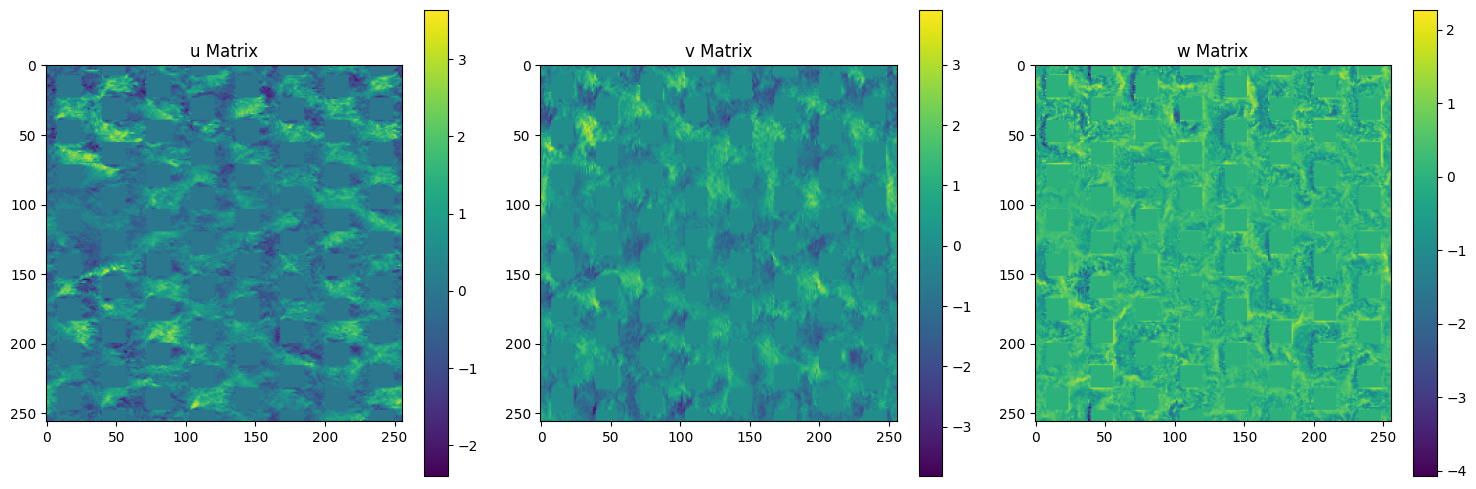

In [8]:
# TESTING
import numpy as np
import matplotlib.pyplot as plt

# Load the matrices from the .npy file
loaded_matrices = np.load(r"H:/DDGAN/DD_test/combined_matrices.npy")

# Extract each matrix
u_matrix_loaded = loaded_matrices[0]
v_matrix_loaded = loaded_matrices[1]
w_matrix_loaded = loaded_matrices[2]

# Plot each matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 3 subplots

axes[0].imshow(u_matrix_loaded, cmap='viridis')
axes[0].set_title('u Matrix')
axes[0].colorbar = plt.colorbar(axes[0].imshow(u_matrix_loaded, cmap='viridis'), ax=axes[0])

axes[1].imshow(v_matrix_loaded, cmap='viridis')
axes[1].set_title('v Matrix')
axes[1].colorbar = plt.colorbar(axes[1].imshow(v_matrix_loaded, cmap='viridis'), ax=axes[1])

axes[2].imshow(w_matrix_loaded, cmap='viridis')
axes[2].set_title('w Matrix')
axes[2].colorbar = plt.colorbar(axes[2].imshow(w_matrix_loaded, cmap='viridis'), ax=axes[2])

plt.tight_layout()
plt.show()

In [19]:
import pyvista as pv
import numpy as np
import os
import glob

# Directories containing the VTK files for u, v, and w datasets
u_directory = r"H:\DDGAN\dataset_u"
v_directory = r"H:\DDGAN\dataset_v"
w_directory = r"H:\DDGAN\dataset_w"

# Directory to save the numpy files
output_directory = r"H:\DDGAN\npy_uvw"
os.makedirs(output_directory, exist_ok=True)  # Ensure output directory exists

# Loop through each u file and find corresponding v and w files
for u_file in glob.glob(os.path.join(u_directory, 'u_*.vtk')):
    timestep = os.path.basename(u_file).split('.')[0]
    v_file = os.path.join(v_directory, f"v_{timestep.split('_')[1]}.vtk")
    w_file = os.path.join(w_directory, f"w_{timestep.split('_')[1]}.vtk")
    print('Processing:', u_file, v_file, w_file)

    try:
        # Read data from VTK files
        u_data = pv.read(u_file)
        v_data = pv.read(v_file)
        w_data = pv.read(w_file)

        # Assuming 'u', 'v', 'w' are keys in the point data of VTK files
        u_matrix = u_data.point_data['u'].reshape(256, 256)
        v_matrix = v_data.point_data['v'].reshape(256, 256)
        w_matrix = w_data.point_data['w'].reshape(256, 256)

        # Save reshaped matrices as a numpy file
        np.save(os.path.join(output_directory, f"{timestep}.npy"), [u_matrix, v_matrix, w_matrix])
        print(f"Processed and saved data for timestep {timestep.split('_')[1]}")
    except Exception as e:
        print(f"Failed to process {timestep} due to: {e}")


Processing: H:\DDGAN\dataset_u\u_0.vtk H:\DDGAN\dataset_v\v_0.vtk H:\DDGAN\dataset_w\w_0.vtk
Processed and saved data for timestep 0
Processing: H:\DDGAN\dataset_u\u_1.vtk H:\DDGAN\dataset_v\v_1.vtk H:\DDGAN\dataset_w\w_1.vtk
Processed and saved data for timestep 1
Processing: H:\DDGAN\dataset_u\u_10.vtk H:\DDGAN\dataset_v\v_10.vtk H:\DDGAN\dataset_w\w_10.vtk
Processed and saved data for timestep 10
Processing: H:\DDGAN\dataset_u\u_100.vtk H:\DDGAN\dataset_v\v_100.vtk H:\DDGAN\dataset_w\w_100.vtk
Processed and saved data for timestep 100
Processing: H:\DDGAN\dataset_u\u_1000.vtk H:\DDGAN\dataset_v\v_1000.vtk H:\DDGAN\dataset_w\w_1000.vtk
Processed and saved data for timestep 1000
Processing: H:\DDGAN\dataset_u\u_1001.vtk H:\DDGAN\dataset_v\v_1001.vtk H:\DDGAN\dataset_w\w_1001.vtk
Processed and saved data for timestep 1001
Processing: H:\DDGAN\dataset_u\u_1002.vtk H:\DDGAN\dataset_v\v_1002.vtk H:\DDGAN\dataset_w\w_1002.vtk
Processed and saved data for timestep 1002
Processing: H:\DDGAN\

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import imageio

# Directory containing the .npy files
npy_directory = r"H:/DDGAN/npy_uvw"

# Directory for saving plots
plot_directory = os.path.join(npy_directory, "plots")
os.makedirs(plot_directory, exist_ok=True)  # Ensure the directory exists

# Helper function to extract the timestep from the filename
def extract_timestep(filename):
    return int(os.path.basename(filename).split('_')[1].split('.')[0])

# Get a sorted list of .npy files based on time steps in the filename
npy_files = sorted(glob.glob(os.path.join(npy_directory, '*.npy')), key=extract_timestep)

# Limit to the first 60 files for processing
npy_files = npy_files[:60]

# Image filenames for creating GIF
image_filenames = []

# Plot and save each matrix as an image
for file_path in npy_files:
    loaded_matrices = np.load(file_path)
    u_matrix, v_matrix, w_matrix = loaded_matrices[0], loaded_matrices[1], loaded_matrices[2]
    timestep = extract_timestep(file_path)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, matrix in enumerate([u_matrix, v_matrix, w_matrix]):
        ax = axes[i]
        im = ax.imshow(matrix, cmap='viridis')
        ax.set_title(['u Matrix', 'v Matrix', 'w Matrix'][i] + f" - Timestep {timestep}")
        plt.colorbar(im, ax=ax)

    plt.tight_layout()

    # Save the plot to a file
    image_filename = os.path.join(plot_directory, f"timestep_{timestep}.png")
    plt.savefig(image_filename)
    image_filenames.append(image_filename)
    plt.close(fig)  # Close the plot to free up memory

# Create a GIF from the saved images
gif_path = os.path.join(npy_directory, 'uvw_matrices.gif')
imageio.mimsave(gif_path, [imageio.imread(filename) for filename in image_filenames], fps=2)

print(f"GIF created at {gif_path}")

C:\Users\SLT2k\AppData\Local\Temp\ipykernel_43444\2783574132.py:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave(gif_path, [imageio.imread(filename) for filename in image_filenames], fps=2)


GIF created at H:/DDGAN/npy_uvw\uvw_matrices.gif


In [1]:
import os
import glob

# Directory containing the .npy files
npy_directory = r"H:/DDGAN/npy_uvw"

# Loop through all files in the directory that match the pattern 'u_*.npy'
for filepath in glob.glob(os.path.join(npy_directory, 'u_*.npy')):
    # Construct the new file name by replacing 'u_' with 'uvw_'
    new_filepath = filepath.replace('u_', 'uvw_')
    
    # Rename the file
    os.rename(filepath, new_filepath)
    print(f'Renamed "{os.path.basename(filepath)}" to "{os.path.basename(new_filepath)}"')


Renamed "u_0.npy" to "uvw_0.npy"
Renamed "u_1.npy" to "uvw_1.npy"
Renamed "u_10.npy" to "uvw_10.npy"
Renamed "u_100.npy" to "uvw_100.npy"
Renamed "u_1000.npy" to "uvw_1000.npy"
Renamed "u_1001.npy" to "uvw_1001.npy"
Renamed "u_1002.npy" to "uvw_1002.npy"
Renamed "u_1003.npy" to "uvw_1003.npy"
Renamed "u_1004.npy" to "uvw_1004.npy"
Renamed "u_1005.npy" to "uvw_1005.npy"
Renamed "u_1006.npy" to "uvw_1006.npy"
Renamed "u_1007.npy" to "uvw_1007.npy"
Renamed "u_1008.npy" to "uvw_1008.npy"
Renamed "u_1009.npy" to "uvw_1009.npy"
Renamed "u_101.npy" to "uvw_101.npy"
Renamed "u_1010.npy" to "uvw_1010.npy"
Renamed "u_1011.npy" to "uvw_1011.npy"
Renamed "u_1012.npy" to "uvw_1012.npy"
Renamed "u_1013.npy" to "uvw_1013.npy"
Renamed "u_1014.npy" to "uvw_1014.npy"
Renamed "u_1015.npy" to "uvw_1015.npy"
Renamed "u_1016.npy" to "uvw_1016.npy"
Renamed "u_1017.npy" to "uvw_1017.npy"
Renamed "u_1018.npy" to "uvw_1018.npy"
Renamed "u_1019.npy" to "uvw_1019.npy"
Renamed "u_102.npy" to "uvw_102.npy"
Renamed 